In [ ]:
# #sklearn 1.1.0버전으로 재설치

# !pip uninstall sklearn
# !pip install --upgrade sklearn
# !pip install scikit-learn==1.1.0 --user

# #버전 확인(커널 닫았다가 열기)
# import sklearn
# sklearn.__version__

# #오버샘플링
# #pip install imblearn

# #xgboost
# pip install xgboost

In [ ]:
# 코랩용 나눔폰트 설치, 실행후 런타임 다시 시작해야함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,025 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 데이터 불러오기, 개요 확인

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
%matplotlib inline

In [ ]:
#코랩용
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hfood = pd.read_csv('호프통닭 생존.csv', encoding='cp949') #csv 불러오기 주피터용

In [ ]:
#hfood = pd.read_csv('/content/drive/MyDrive/bigdata_ML/호프통닭 생존.csv', encoding='cp949') #csv 불러오기 코랩용

In [ ]:
hfood.head() #csv 5행만 보기

,영업상태구분코드,사업장명,소재지면적,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업,...,아파트 세대수,제곱미터 당 임대료,임대료,총생활인구수,점심저녁시간대 생활인구수,골목상권,발달상권,구분불가,전통시장,관광특구
0,1,돈자루,31,90,8,165,287,556,692,1248,...,9416,30987.5555,971,11670.19361,10936.29824,1,0,0,0,0
1,1,여기가좋겠네,33,87,8,147,265,527,677,1204,...,9216,30987.5555,1023,11670.19361,10936.29824,1,0,0,0,0
2,1,작은공간,23,95,8,167,293,568,710,1278,...,6606,30987.5555,726,11670.19361,10936.29824,1,0,0,0,0
3,1,헐레벌닭 시흥점,14,91,8,151,271,541,689,1230,...,8886,30987.5555,446,11670.19361,10936.29824,1,0,0,0,0
4,1,우리 포차,29,95,8,164,296,578,727,1305,...,7620,30987.5555,888,11670.19361,10936.29824,1,0,0,0,0


In [ ]:
hfood.info() #데이터 개요 확인 (열이름, 개수,데이터유형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   영업상태구분코드       4618 non-null   int64  
 1   사업장명           4618 non-null   object 
 2   소재지면적          4618 non-null   int64  
 3   교통 수           4618 non-null   int64  
 4   집객시설 수         4618 non-null   int64  
 5   교육 수           4618 non-null   int64  
 6   경쟁자 수          4618 non-null   int64  
 7   인허가 영업         4618 non-null   int64  
 8   인허가 폐업         4618 non-null   int64  
 9   인허가 영업+폐업      4618 non-null   int64  
 10  타업종비율          4618 non-null   float64
 11  타업종경쟁자         4618 non-null   int64  
 12  버퍼내폐업비율        4618 non-null   float64
 13  영업기간           4618 non-null   int64  
 14  생존여부           4618 non-null   int64  
 15  아파트 세대수        4618 non-null   int64  
 16  제곱미터 당 임대료     4618 non-null   float64
 17  임대료            4618 non-null   int64  
 18  총생활인구수  

# 결측치 확인 및 전처리

In [ ]:
#문자형 변수 확인
object_columns = hfood.columns[hfood.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 보아서 봅시다
hfood[object_columns]

object 칼럼은 다음과 같습니다 :  ['사업장명']


,사업장명
0,돈자루
1,여기가좋겠네
2,작은공간
3,헐레벌닭 시흥점
4,우리 포차
...,...
4613,카페아리지(Cafe Ariji)
4614,비어공사중
4615,허니바베큐
4616,잇초메


In [ ]:
feature1columns =list(hfood.columns.difference(hfood[object_columns].columns)) #필요없는 문자형 변수 제외
hfood=hfood[feature1columns]

In [ ]:
hfood

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,제곱미터 당 임대료,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,287,1,0,165,90,0,0,0.554487,0,31,...,1248,692,971,0,10936.29824,30987.55550,8,11670.19361,961,0.770032
1,265,1,0,147,87,0,0,0.562292,1,33,...,1204,677,1023,0,10936.29824,30987.55550,8,11670.19361,939,0.779900
2,293,1,0,167,95,0,0,0.555556,0,23,...,1278,710,726,0,10936.29824,30987.55550,8,11670.19361,985,0.770736
3,271,1,0,151,91,0,0,0.560163,0,14,...,1230,689,446,0,10936.29824,30987.55550,8,11670.19361,959,0.779675
4,296,1,0,164,95,0,0,0.557088,0,29,...,1305,727,888,0,10936.29824,30987.55550,8,11670.19361,1009,0.773180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,345,0,0,147,65,1,0,0.540627,0,40,...,1883,1018,1235,0,44202.78123,30875.16667,17,44286.53272,1538,0.816782
4614,279,0,0,189,66,1,0,0.555694,0,28,...,1607,893,1003,0,44202.78123,35804.80750,14,44286.53272,1328,0.826385
4615,363,0,0,119,61,1,0,0.540417,0,31,...,1967,1063,942,0,44202.78123,30875.16667,16,44286.53272,1604,0.815455
4616,317,0,0,182,74,1,0,0.546883,0,30,...,1845,1009,917,0,44202.78123,30875.16667,17,44286.53272,1528,0.828184


In [ ]:
feature2columns =list(hfood.columns.difference(hfood[['영업기간','제곱미터 당 임대료']].columns)) #추가로 필요없는 변수 제외
hfood=hfood[feature2columns]

In [ ]:
hfood

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,287,1,0,165,90,0,0,0.554487,0,31,...,556,1248,692,971,0,10936.29824,8,11670.19361,961,0.770032
1,265,1,0,147,87,0,0,0.562292,1,33,...,527,1204,677,1023,0,10936.29824,8,11670.19361,939,0.779900
2,293,1,0,167,95,0,0,0.555556,0,23,...,568,1278,710,726,0,10936.29824,8,11670.19361,985,0.770736
3,271,1,0,151,91,0,0,0.560163,0,14,...,541,1230,689,446,0,10936.29824,8,11670.19361,959,0.779675
4,296,1,0,164,95,0,0,0.557088,0,29,...,578,1305,727,888,0,10936.29824,8,11670.19361,1009,0.773180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,345,0,0,147,65,1,0,0.540627,0,40,...,865,1883,1018,1235,0,44202.78123,17,44286.53272,1538,0.816782
4614,279,0,0,189,66,1,0,0.555694,0,28,...,714,1607,893,1003,0,44202.78123,14,44286.53272,1328,0.826385
4615,363,0,0,119,61,1,0,0.540417,0,31,...,904,1967,1063,942,0,44202.78123,16,44286.53272,1604,0.815455
4616,317,0,0,182,74,1,0,0.546883,0,30,...,836,1845,1009,917,0,44202.78123,17,44286.53272,1528,0.828184


In [ ]:
#출처 : https://dacon.io/competitions/official/235959/codeshare/5934?page&dtype&ptype&fType
# 먼저 결측치가 얼마나 있는지 확인합니다. 
# csv형태에서 먼저 결측치있는 행을 제거하여 null값이 없습니다

hfood.isna().sum()

경쟁자 수            0
골목상권             0
관광특구             0
교육 수             0
교통 수             0
구분불가             0
발달상권             0
버퍼내폐업비율          0
생존여부             0
소재지면적            0
아파트 세대수          0
영업상태구분코드         0
인허가 영업           0
인허가 영업+폐업        0
인허가 폐업           0
임대료              0
전통시장             0
점심저녁시간대 생활인구수    0
집객시설 수           0
총생활인구수           0
타업종경쟁자           0
타업종비율            0
dtype: int64

# EDA

In [ ]:
hfood.describe(include="all") #데이터의 통계적인 개요 확인

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
count,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,...,4618.000000,4618.00000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000
mean,251.838891,0.351018,0.000650,196.868558,86.982027,0.429623,0.177133,0.498711,0.178865,59.435903,...,844.061498,1695.73495,851.673452,2132.403205,0.041576,31015.373796,17.580771,29853.056418,1443.896059,0.850366
std,169.132186,0.477340,0.025482,152.747738,27.184389,0.495076,0.381823,0.053694,0.383281,53.942572,...,439.657770,911.42388,490.718847,2213.700849,0.199641,20170.176983,28.845741,15983.283236,788.055232,0.047512
min,2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.227273,0.000000,5.000000,...,10.000000,19.00000,9.000000,132.000000,0.000000,3443.532098,0.000000,2960.416900,14.000000,0.736842
25%,135.000000,0.000000,0.000000,111.000000,68.000000,0.000000,0.000000,0.473684,0.000000,28.000000,...,530.000000,1090.00000,540.000000,909.000000,0.000000,18597.212010,7.000000,19288.244250,921.250000,0.815790
50%,212.500000,0.000000,0.000000,160.000000,87.000000,0.000000,0.000000,0.505302,0.000000,42.000000,...,767.000000,1503.00000,737.000000,1459.500000,0.000000,25660.579920,12.000000,26179.793200,1282.000000,0.838344
75%,310.750000,1.000000,0.000000,250.000000,105.000000,1.000000,0.000000,0.534477,0.000000,70.000000,...,1056.750000,2064.00000,1009.750000,2486.000000,0.000000,35286.789950,17.000000,36081.925980,1749.750000,0.880990
max,976.000000,1.000000,1.000000,1647.000000,177.000000,1.000000,1.000000,0.652324,1.000000,618.000000,...,2641.000000,5115.00000,2818.000000,35705.000000,1.000000,134994.908800,320.000000,108753.472800,4904.000000,0.984199


In [ ]:
#주피터에서
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
#코랩에서
#plt.rc('font', family='NanumBarunGothic') 

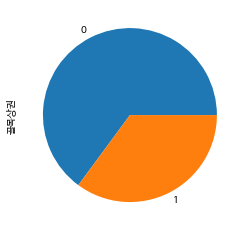

In [ ]:
hfood['골목상권'].value_counts().plot(kind="pie") #범주형 데이터 확인

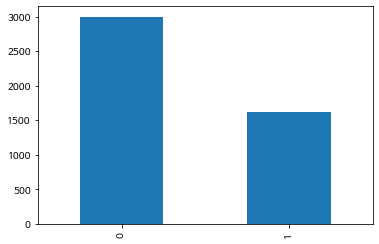

In [ ]:
hfood['골목상권'].value_counts().plot(kind="bar") #범주형 데이터 확인

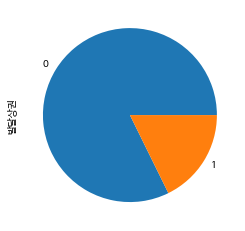

In [ ]:
hfood['발달상권'].value_counts().plot(kind="pie") #범주형 데이터 확인

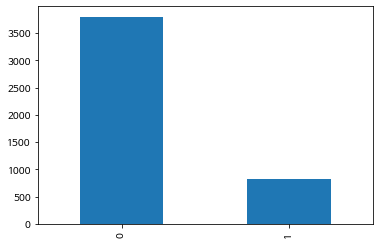

In [ ]:
hfood['발달상권'].value_counts().plot(kind="bar") #범주형 데이터 확인

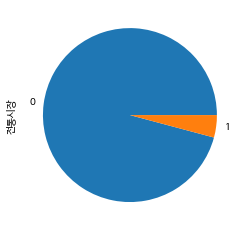

In [ ]:
hfood['전통시장'].value_counts().plot(kind="pie") #범주형 데이터 확인

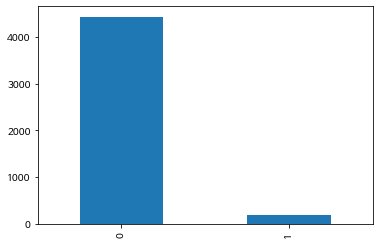

In [ ]:
hfood['전통시장'].value_counts().plot(kind="bar") #범주형 데이터 확인

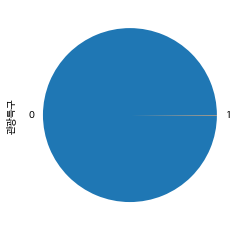

In [ ]:
hfood['관광특구'].value_counts().plot(kind="pie")#범주형 데이터 확인

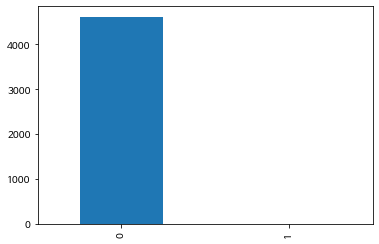

In [ ]:
hfood['관광특구'].value_counts().plot(kind="bar")#범주형 데이터 확인

In [ ]:
hfood['생존여부'].value_counts() #범주형 target 데이터 확인

0    3792
1     826
Name: 생존여부, dtype: int64

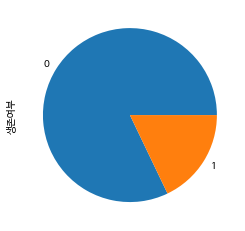

In [ ]:
hfood['생존여부'].value_counts().plot(kind="pie") #원그래프로 범주형 데이터 확인 

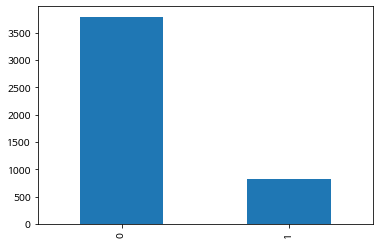

In [ ]:
hfood['생존여부'].value_counts().plot(kind="bar") #막대그래프로 범주형 데이터 확인, 폐업이 더 많이 차지합니다. 데이터가 불균형합니다

In [ ]:
hfood.columns#열이름 확인

Index(['경쟁자 수', '골목상권', '관광특구', '교육 수', '교통 수', '구분불가', '발달상권', '버퍼내폐업비율',
       '생존여부', '소재지면적', '아파트 세대수', '영업상태구분코드', '인허가 영업', '인허가 영업+폐업', '인허가 폐업',
       '임대료', '전통시장', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자', '타업종비율'],
      dtype='object')

In [ ]:
#연속형 변수 기초통계량 확인
hfood[["교통 수","집객시설 수","교육 수","경쟁자 수","인허가 영업","인허가 폐업","인허가 영업+폐업"]].describe()
# 교통 수 제외 모두 이상치 많이 있을 것으로 예상 (mean, min, max, 분산 확인결과)

,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업
count,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.00000
mean,86.982027,17.580771,196.868558,251.838891,844.061498,851.673452,1695.73495
std,27.184389,28.845741,152.747738,169.132186,439.657770,490.718847,911.42388
min,7.000000,0.000000,0.000000,2.000000,10.000000,9.000000,19.00000
25%,68.000000,7.000000,111.000000,135.000000,530.000000,540.000000,1090.00000
50%,87.000000,12.000000,160.000000,212.500000,767.000000,737.000000,1503.00000
75%,105.000000,17.000000,250.000000,310.750000,1056.750000,1009.750000,2064.00000
max,177.000000,320.000000,1647.000000,976.000000,2641.000000,2818.000000,5115.00000


In [ ]:
#연속형 변수 기초통계량 확인
hfood[["타업종비율","타업종경쟁자","버퍼내폐업비율","아파트 세대수","임대료","총생활인구수",
      "점심저녁시간대 생활인구수"]].describe()
#타업종비율, 버퍼내폐업비율 제외 모두 이상치 많이 있을 것으로 예상 (mean, min, max, 분산 확인결과)

,타업종비율,타업종경쟁자,버퍼내폐업비율,아파트 세대수,임대료,총생활인구수,점심저녁시간대 생활인구수
count,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000
mean,0.850366,1443.896059,0.498711,9947.543092,2132.403205,29853.056418,31015.373796
std,0.047512,788.055232,0.053694,6930.112062,2213.700849,15983.283236,20170.176983
min,0.736842,14.000000,0.227273,0.000000,132.000000,2960.416900,3443.532098
25%,0.815790,921.250000,0.473684,4669.000000,909.000000,19288.244250,18597.212010
50%,0.838344,1282.000000,0.505302,8426.500000,1459.500000,26179.793200,25660.579920
75%,0.880990,1749.750000,0.534477,13576.250000,2486.000000,36081.925980,35286.789950
max,0.984199,4904.000000,0.652324,37869.000000,35705.000000,108753.472800,134994.908800


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

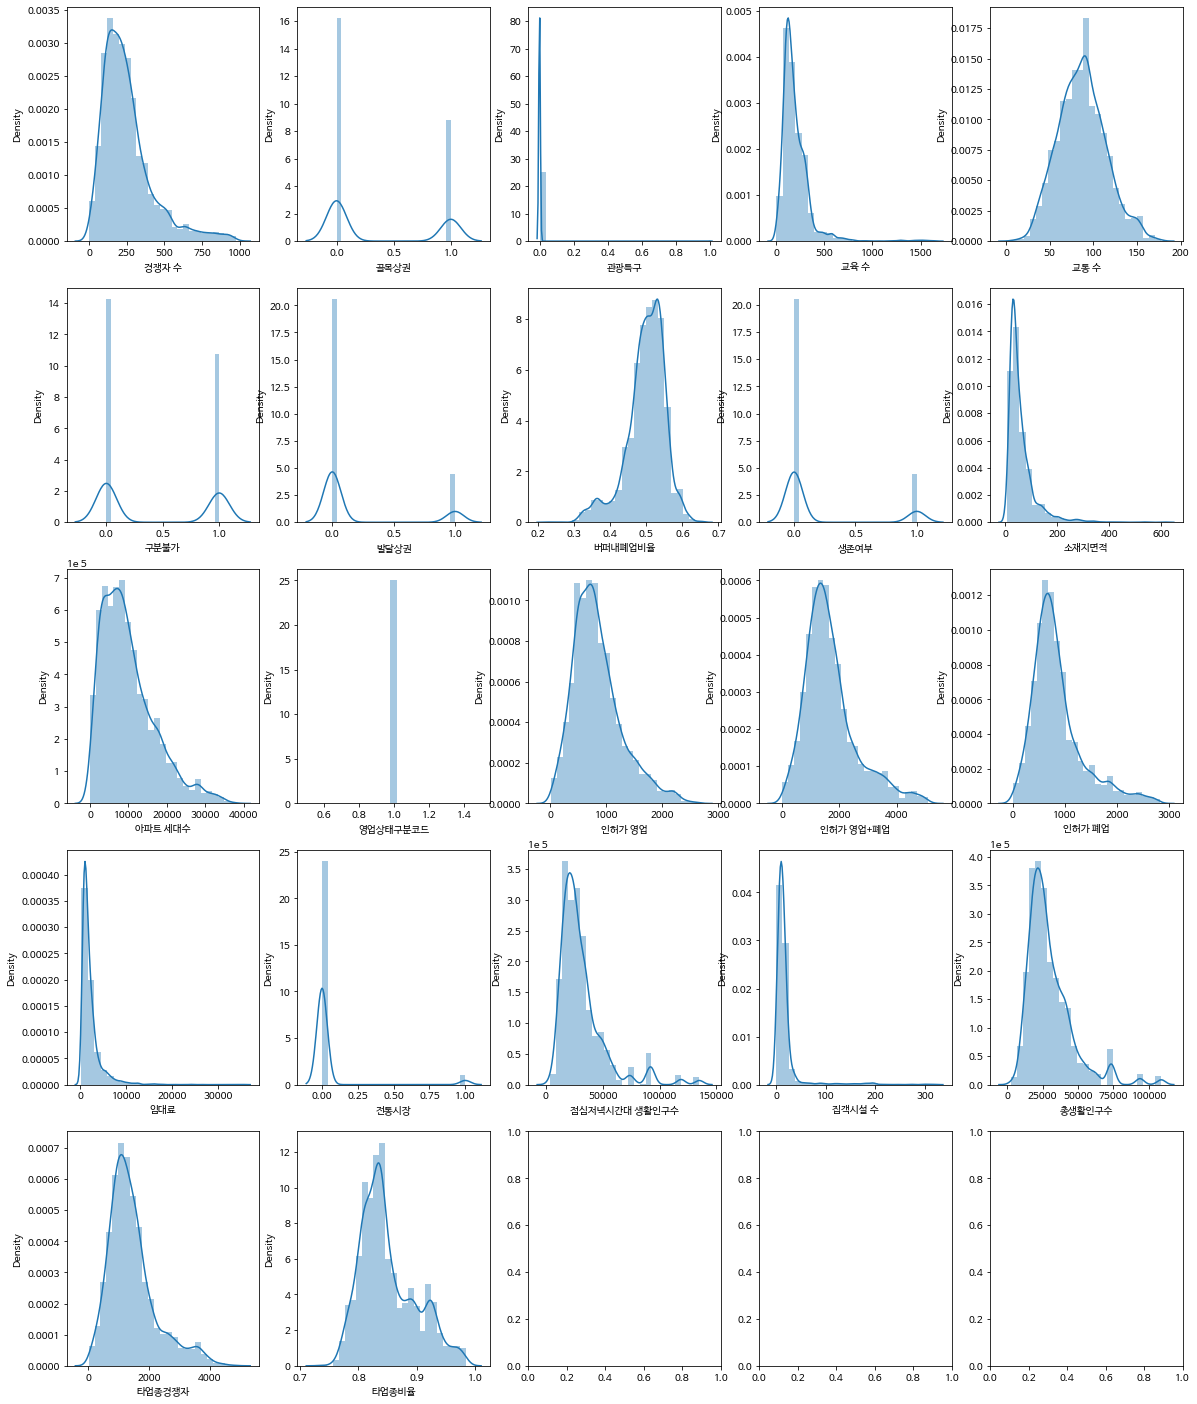

In [ ]:
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(hfood.columns):
    sns.distplot(hfood[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 
#전체 히스토그램그려보기

In [ ]:
for col in hfood:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(hfood[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(hfood[col].kurt())  
         ) #왜도 첨도 확인
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]
#log변환 필요한 변수(왜도가 -1~1 밖의 값) :'경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '인허가 영업+폐업','인허가 폐업', '임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자'

경쟁자 수           Skewness: 01.59     Kurtosis: 003.01
골목상권            Skewness: 00.62     Kurtosis: -01.61
관광특구            Skewness: 39.21     Kurtosis: 1536.00
교육 수            Skewness: 04.06     Kurtosis: 027.38
교통 수            Skewness: 00.26     Kurtosis: -00.03
구분불가            Skewness: 00.28     Kurtosis: -01.92
발달상권            Skewness: 01.69     Kurtosis: 000.86
버퍼내폐업비율         Skewness: -0.94     Kurtosis: 001.41
생존여부            Skewness: 01.68     Kurtosis: 000.81
소재지면적           Skewness: 03.28     Kurtosis: 016.87
아파트 세대수         Skewness: 01.10     Kurtosis: 001.03
영업상태구분코드        Skewness: 00.00     Kurtosis: 000.00
인허가 영업          Skewness: 00.98     Kurtosis: 001.03
인허가 영업+폐업       Skewness: 01.17     Kurtosis: 001.47
인허가 폐업          Skewness: 01.40     Kurtosis: 002.20
임대료             Skewness: 04.08     Kurtosis: 029.31
전통시장            Skewness: 04.59     Kurtosis: 019.12
점심저녁시간대 생활인구수   Skewness: 02.37     Kurtosis: 007.18
집객시설 수          Skewness: 05.96     Kurtosis:

# 정규화 (로그변환 및 로버스트 스케일링)

In [ ]:
#출처 - https://soo-jjeong.tistory.com/122
hAfood1=hfood.copy()
hArob = hAfood1[hAfood1.columns.difference([ '경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '인허가 영업+폐업','인허가 폐업', '임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자',
                                 '제곱미터 당 임대료','영업상태구분코드','골목상권','관광특구','구분불가','발달상권','전통시장','생존여부'])] #로버스트스케일링할 데이터
hAdis =hAfood1[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']] #범주형 변수 데이터
hAlog =hAfood1[[ '경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '인허가 영업+폐업','인허가 폐업', '임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자']] #log변환 데이터

In [ ]:
hAlog.head() #log변환할 데이터

,경쟁자 수,교육 수,소재지면적,아파트 세대수,인허가 영업+폐업,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자
0,287,165,31,9416,1248,692,971,10936.29824,8,11670.19361,961
1,265,147,33,9216,1204,677,1023,10936.29824,8,11670.19361,939
2,293,167,23,6606,1278,710,726,10936.29824,8,11670.19361,985
3,271,151,14,8886,1230,689,446,10936.29824,8,11670.19361,959
4,296,164,29,7620,1305,727,888,10936.29824,8,11670.19361,1009


In [ ]:
hAdis.head() #범주형 데이터

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,1
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [ ]:
hArob.head() #로버스트 스케일링 데이터

,교통 수,버퍼내폐업비율,인허가 영업,타업종비율
0,90,0.554487,556,0.770032
1,87,0.562292,527,0.779900
2,95,0.555556,568,0.770736
3,91,0.560163,541,0.779675
4,95,0.557088,578,0.773180


In [ ]:
hAlog.columns #로그변환할 열 이름

Index(['경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '인허가 영업+폐업', '인허가 폐업', '임대료',
       '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.756
Kurtosis: 2.227


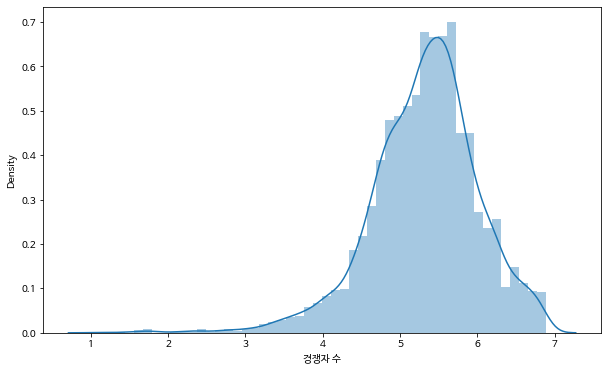

In [ ]:
hAlog["경쟁자 수"] = np.log1p(hAlog["경쟁자 수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog["경쟁자 수"])

print("Skewness: {:.3f}".format(hAlog["경쟁자 수"].skew()))
print("Kurtosis: {:.3f}".format(hAlog["경쟁자 수"].kurt()))#경쟁자 수 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.509
Kurtosis: 3.105


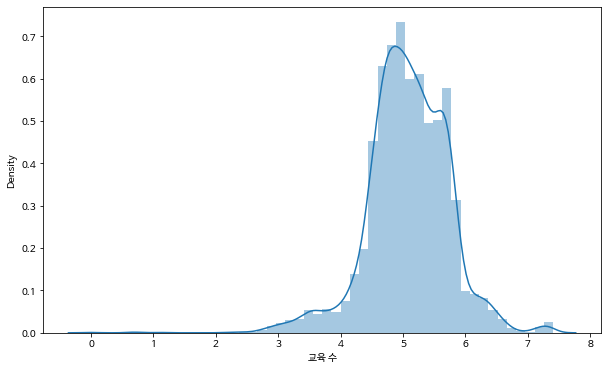

In [ ]:
hAlog["교육 수"] = np.log1p(hAlog["교육 수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog["교육 수"])

print("Skewness: {:.3f}".format(hAlog["교육 수"].skew()))
print("Kurtosis: {:.3f}".format(hAlog["교육 수"].kurt()))#교육 수 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.432
Kurtosis: 0.257


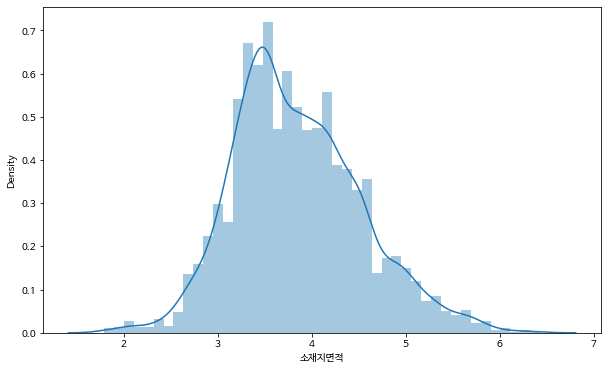

In [ ]:
hAlog["소재지면적"] = np.log1p(hAlog["소재지면적"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog["소재지면적"])

print("Skewness: {:.3f}".format(hAlog["소재지면적"].skew()))
print("Kurtosis: {:.3f}".format(hAlog["소재지면적"].kurt()))#소재지면적 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -2.588
Kurtosis: 19.397


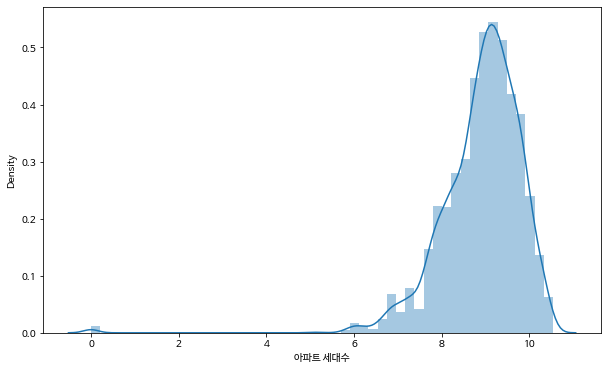

In [ ]:
hAlog["아파트 세대수"] = np.log1p(hAlog["아파트 세대수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog["아파트 세대수"])

print("Skewness: {:.3f}".format(hAlog["아파트 세대수"].skew()))
print("Kurtosis: {:.3f}".format(hAlog["아파트 세대수"].kurt())) #아파트 세대수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.135
Kurtosis: 4.293


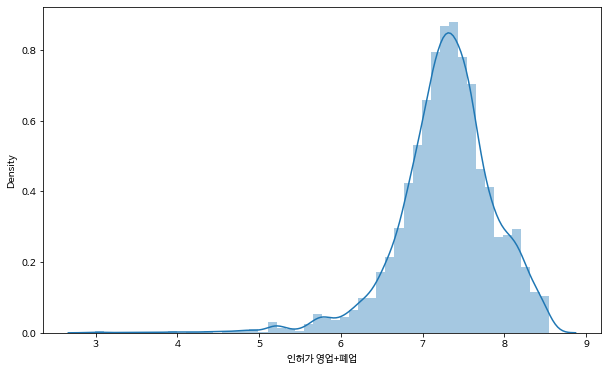

In [ ]:
hAlog['인허가 영업+폐업'] = np.log1p(hAlog['인허가 영업+폐업'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog['인허가 영업+폐업'])

print("Skewness: {:.3f}".format(hAlog['인허가 영업+폐업'].skew()))
print("Kurtosis: {:.3f}".format(hAlog['인허가 영업+폐업'].kurt()))#인허가 영업+폐업 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.053
Kurtosis: 4.326


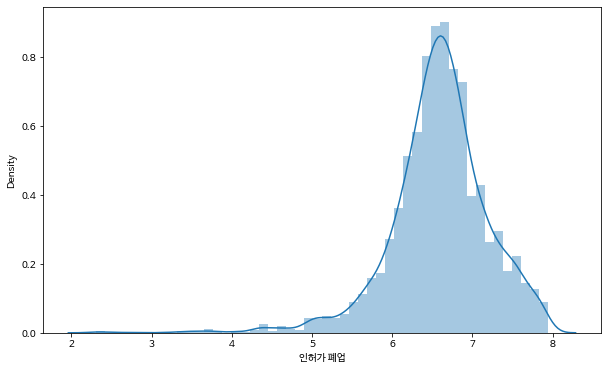

In [ ]:
hAlog['인허가 폐업'] = np.log1p(hAlog['인허가 폐업'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog['인허가 폐업'])

print("Skewness: {:.3f}".format(hAlog['인허가 폐업'].skew()))
print("Kurtosis: {:.3f}".format(hAlog['인허가 폐업'].kurt()))#인허가 폐업 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.432
Kurtosis: 0.232


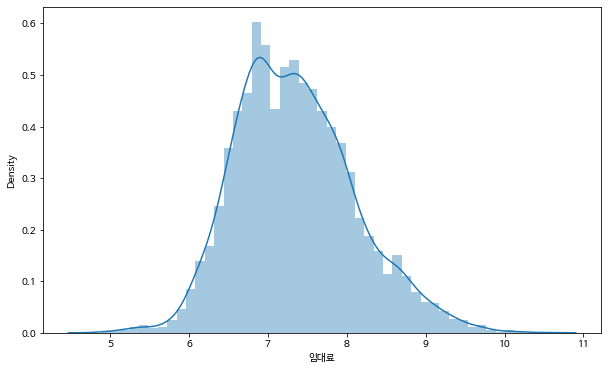

In [ ]:
hAlog['임대료'] = np.log1p(hAlog['임대료'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog['임대료'])

print("Skewness: {:.3f}".format(hAlog['임대료'].skew()))
print("Kurtosis: {:.3f}".format(hAlog['임대료'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.341
Kurtosis: 0.635


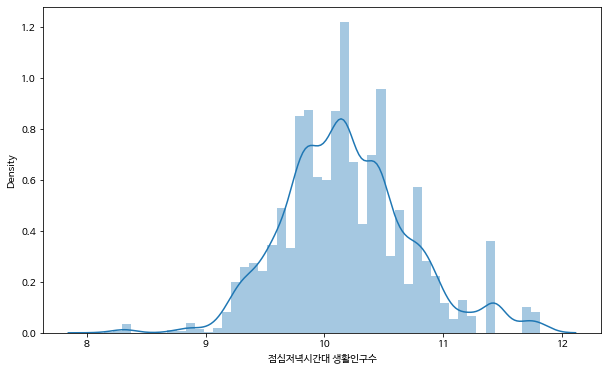

In [ ]:
hAlog['점심저녁시간대 생활인구수'] = np.log1p(hAlog['점심저녁시간대 생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog['점심저녁시간대 생활인구수'])

print("Skewness: {:.3f}".format(hAlog['점심저녁시간대 생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(hAlog['점심저녁시간대 생활인구수'].kurt()))#점심저녁시간대 생활인구수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.898
Kurtosis: 3.568


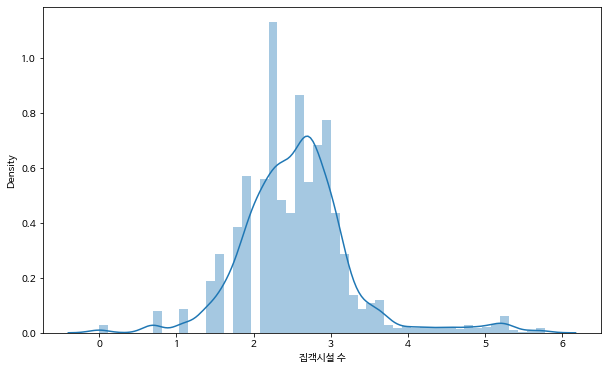

In [ ]:
hAlog['집객시설 수'] = np.log1p(hAlog['집객시설 수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog['집객시설 수'])

print("Skewness: {:.3f}".format(hAlog['집객시설 수'].skew()))
print("Kurtosis: {:.3f}".format(hAlog['집객시설 수'].kurt()))#집객시설 수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.083
Kurtosis: 0.646


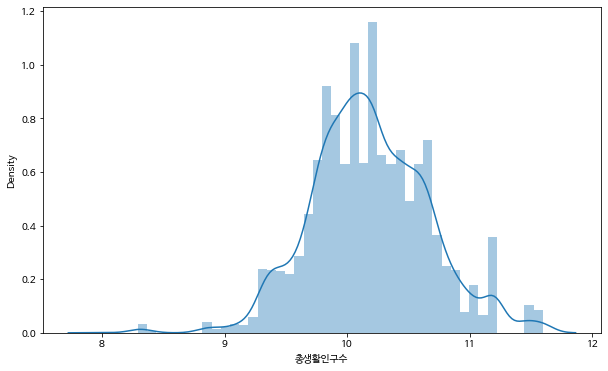

In [ ]:
hAlog['총생활인구수'] = np.log1p(hAlog['총생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog['총생활인구수'])

print("Skewness: {:.3f}".format(hAlog['총생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(hAlog['총생활인구수'].kurt()))#총생활인구수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.088
Kurtosis: 4.160


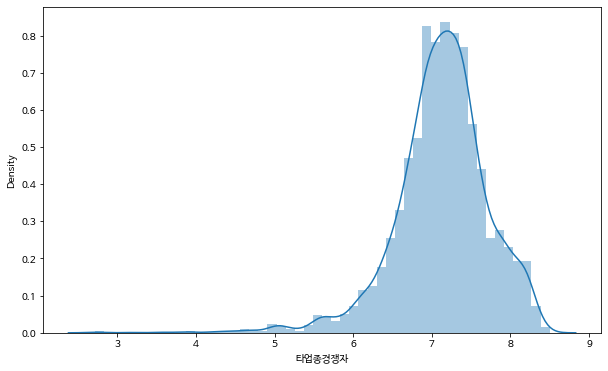

In [ ]:
hAlog['타업종경쟁자'] = np.log1p(hAlog['타업종경쟁자'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(hAlog['타업종경쟁자'])

print("Skewness: {:.3f}".format(hAlog['타업종경쟁자'].skew()))
print("Kurtosis: {:.3f}".format(hAlog['타업종경쟁자'].kurt())) #타업종경쟁자 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

In [ ]:
hAlog.head() #log 변환 결과

,경쟁자 수,교육 수,소재지면적,아파트 세대수,인허가 영업+폐업,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자
0,5.662960,5.111988,3.465736,9.150272,7.130099,6.541030,6.879356,9.299934,2.197225,9.364879,6.869014
1,5.583496,4.997212,3.526361,9.128805,7.094235,6.519147,6.931472,9.299934,2.197225,9.364879,6.845880
2,5.683580,5.123964,3.178054,8.795885,7.153834,6.566672,6.588926,9.299934,2.197225,9.364879,6.893656
3,5.605802,5.023881,2.708050,9.092345,7.115582,6.536692,6.102559,9.299934,2.197225,9.364879,6.866933
4,5.693732,5.105945,3.401197,8.938663,7.174724,6.590301,6.790097,9.299934,2.197225,9.364879,6.917706


In [ ]:
scaler = RobustScaler() #로버스트 스케일링
hdf_robust = scaler.fit_transform(hArob)

In [ ]:
hrobust = pd.DataFrame(hdf_robust, columns =hArob.columns)

In [ ]:
hrobust #결과값 확인

,교통 수,버퍼내폐업비율,인허가 영업,타업종비율
0,0.081081,0.809063,-0.400570,-1.047733
1,0.000000,0.937453,-0.455624,-0.896378
2,0.216216,0.826637,-0.377788,-1.036943
3,0.108108,0.902420,-0.429046,-0.899837
4,0.216216,0.851847,-0.358804,-0.999450
...,...,...,...,...
4613,-0.594595,0.581066,0.186047,-0.330708
4614,-0.567568,0.828912,-0.100617,-0.183424
4615,-0.702703,0.577615,0.260085,-0.351057
4616,-0.351351,0.683986,0.130992,-0.155821


In [ ]:
hAlog.columns #변수이름

Index(['경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '인허가 영업+폐업', '인허가 폐업', '임대료',
       '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자'],
      dtype='object')

In [ ]:
hrobust[['경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '인허가 영업+폐업', '인허가 폐업', '임대료',
       '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자']]=hAlog #연속형 변수끼리 합치기

In [ ]:
hrobust

,교통 수,버퍼내폐업비율,인허가 영업,타업종비율,경쟁자 수,교육 수,소재지면적,아파트 세대수,인허가 영업+폐업,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자
0,0.081081,0.809063,-0.400570,-1.047733,5.662960,5.111988,3.465736,9.150272,7.130099,6.541030,6.879356,9.299934,2.197225,9.364879,6.869014
1,0.000000,0.937453,-0.455624,-0.896378,5.583496,4.997212,3.526361,9.128805,7.094235,6.519147,6.931472,9.299934,2.197225,9.364879,6.845880
2,0.216216,0.826637,-0.377788,-1.036943,5.683580,5.123964,3.178054,8.795885,7.153834,6.566672,6.588926,9.299934,2.197225,9.364879,6.893656
3,0.108108,0.902420,-0.429046,-0.899837,5.605802,5.023881,2.708050,9.092345,7.115582,6.536692,6.102559,9.299934,2.197225,9.364879,6.866933
4,0.216216,0.851847,-0.358804,-0.999450,5.693732,5.105945,3.401197,8.938663,7.174724,6.590301,6.790097,9.299934,2.197225,9.364879,6.917706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,-0.594595,0.581066,0.186047,-0.330708,5.846439,4.997212,3.713572,9.024613,7.541152,6.926577,7.119636,10.696566,2.890372,10.698458,7.338888
4614,-0.567568,0.828912,-0.100617,-0.183424,5.634790,5.247024,3.367296,9.024372,7.382746,6.795706,6.911747,10.696566,2.708050,10.698458,7.192182
4615,-0.702703,0.577615,0.260085,-0.351057,5.897154,4.787492,3.465736,9.084550,7.584773,6.969791,6.849066,10.696566,2.833213,10.698458,7.380879
4616,-0.351351,0.683986,0.130992,-0.155821,5.762051,5.209486,3.433987,9.143559,7.520776,6.917706,6.822197,10.696566,2.890372,10.698458,7.332369


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

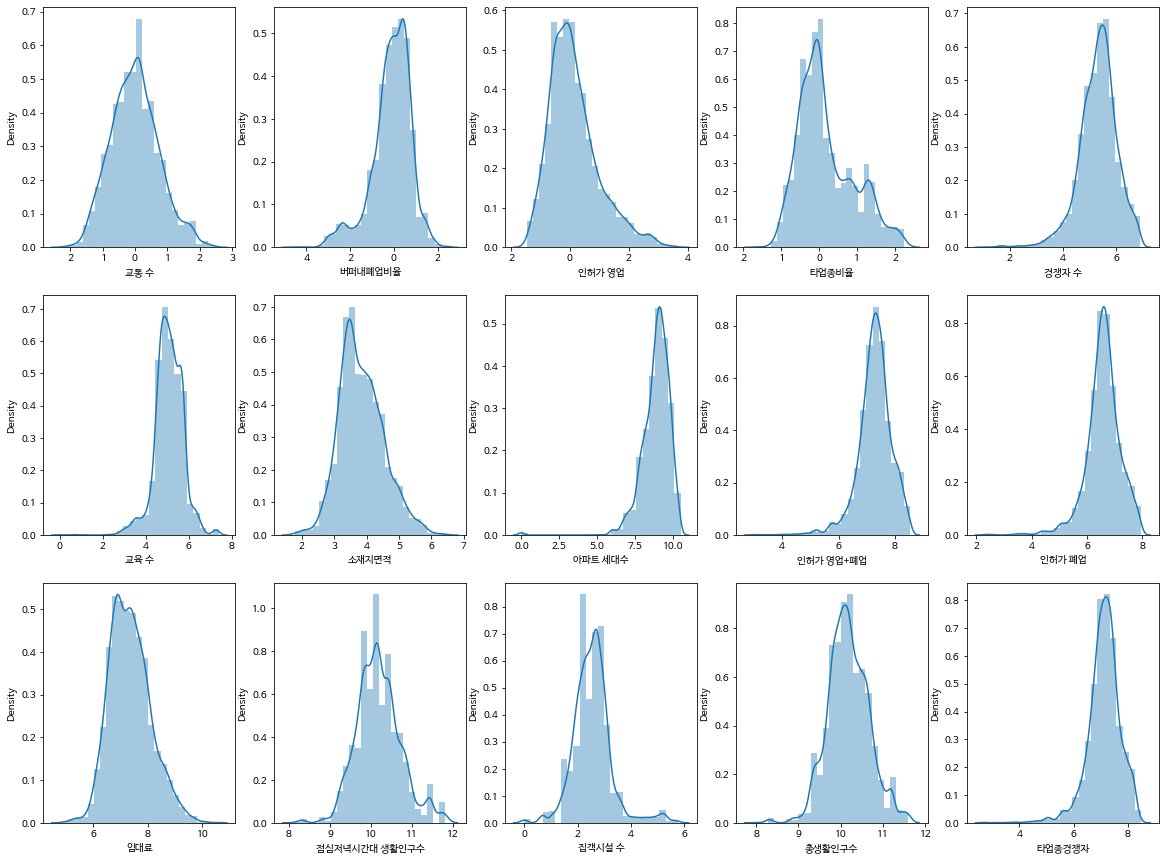

In [ ]:
col_n = 5
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))
for i,col in enumerate(hrobust.columns):
    sns.distplot(hrobust[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])
#연속형변수 전체 히스토그램그려보기    
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 

# 다중공선성 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

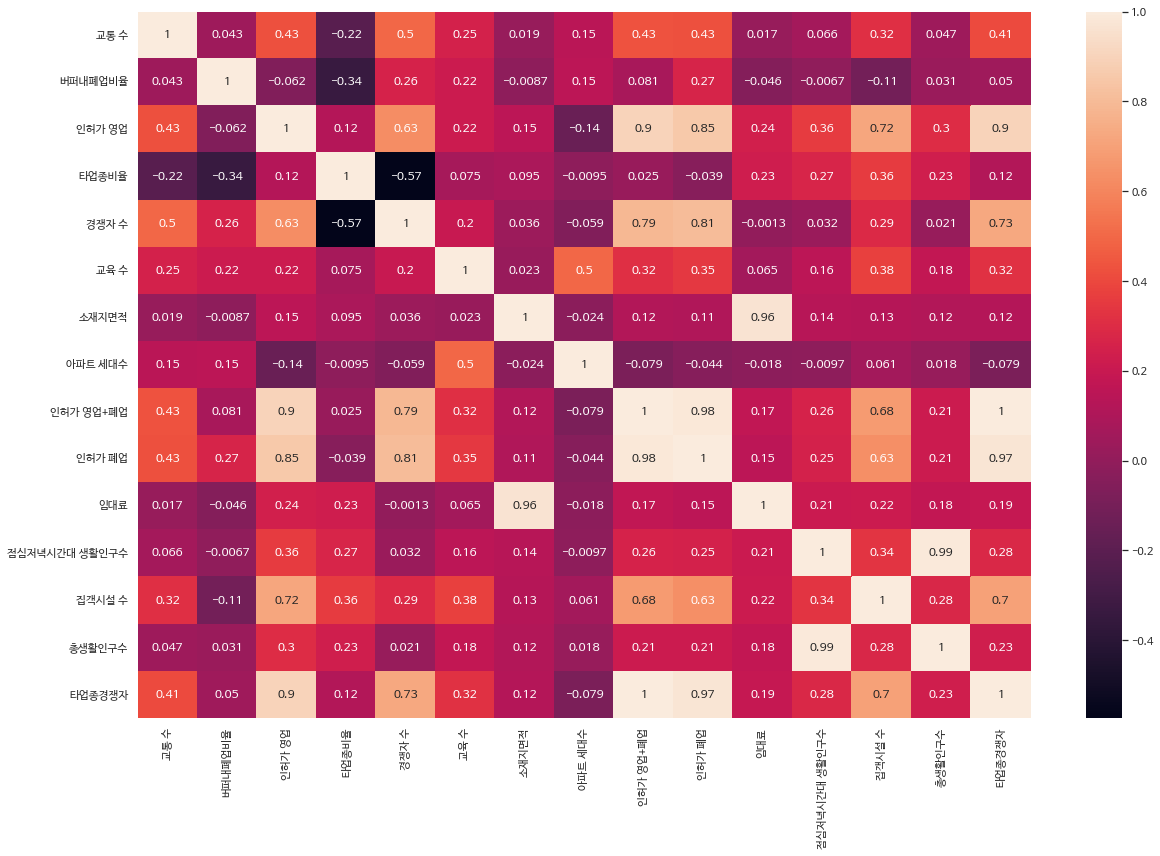

In [ ]:
#히트맵그리기-코랩용
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
plt.rc("font", family = "NanumBarunGothic")
sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="NanumBarunGothic", style='white')
sns.heatmap(hrobust.corr(), annot = True) 
plt.show()

In [ ]:
#히트맵그리기- 주피터용
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
plt.rc("font", family = "Malgun Gothic")
sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="Malgun Gothic", style='white')
sns.heatmap(robust.corr(), annot = True) 
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#다중공선성 확인
vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(hrobust.values, i) for i in range(hrobust.shape[1])] #x_data.shape[1]는 변수를 뜻함
vif['features'] = hrobust.columns
vif

,VIF Factor,features
0,1.620010e+00,교통 수
1,1.179019e+02,버퍼내폐업비율
2,8.748271e+00,인허가 영업
3,1.201556e+03,타업종비율
4,4.780003e+03,경쟁자 수
5,1.222809e+02,교육 수
6,7.573754e+02,소재지면적
7,1.472871e+02,아파트 세대수
8,1.130398e+07,인허가 영업+폐업
9,3.851368e+05,인허가 폐업


In [ ]:
vif = pd.DataFrame()
x_data2 = hrobust.drop('인허가 영업+폐업', axis=1) #인허가 영업+폐업 칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,1.595741,교통 수
1,69.720599,버퍼내폐업비율
2,6.612432,인허가 영업
3,23.320251,타업종비율
4,2235.893521,경쟁자 수
5,116.162964,교육 수
6,723.919111,소재지면적
7,138.799029,아파트 세대수
8,212472.525960,인허가 폐업
9,2279.079655,임대료


In [ ]:
vif = pd.DataFrame()
x_data3 = x_data2.drop('인허가 폐업', axis=1)  #인허가 영업 칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,1.595132,교통 수
1,1.228511,버퍼내폐업비율
2,4.734425,인허가 영업
3,16.155388,타업종비율
4,2145.581675,경쟁자 수
5,113.342063,교육 수
6,544.937606,소재지면적
7,138.694250,아파트 세대수
8,1643.957928,임대료
9,22876.043026,점심저녁시간대 생활인구수


In [ ]:
vif = pd.DataFrame()
x_data4 = x_data3.drop('총생활인구수', axis=1) #총생활인구수 칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns
vif

,VIF Factor,features
0,1.590329,교통 수
1,1.228450,버퍼내폐업비율
2,3.878392,인허가 영업
3,15.885350,타업종비율
4,2139.565736,경쟁자 수
5,108.070761,교육 수
6,543.807072,소재지면적
7,138.185202,아파트 세대수
8,1640.498763,임대료
9,361.789069,점심저녁시간대 생활인구수


In [ ]:
vif = pd.DataFrame()
x_data5 = x_data4.drop('타업종경쟁자', axis=1) #타업종경쟁자 제거, 이 이상 제거는 로지스틱 분석 후 검토
vif["VIF Factor"] = [variance_inflation_factor(x_data5.values, i) for i in range(x_data5.shape[1])]
vif['features'] = x_data5.columns
vif

,VIF Factor,features
0,1.474055,교통 수
1,1.228366,버퍼내폐업비율
2,3.874414,인허가 영업
3,4.291043,타업종비율
4,235.088492,경쟁자 수
5,107.785921,교육 수
6,509.824657,소재지면적
7,136.879526,아파트 세대수
8,1516.372972,임대료
9,312.297100,점심저녁시간대 생활인구수


In [ ]:
x_data5 #제거후 데이터 프레임 확인

,교통 수,버퍼내폐업비율,인허가 영업,타업종비율,경쟁자 수,교육 수,소재지면적,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수
0,0.081081,0.809063,-0.400570,-1.047733,5.662960,5.111988,3.465736,9.150272,6.879356,9.299934,2.197225
1,0.000000,0.937453,-0.455624,-0.896378,5.583496,4.997212,3.526361,9.128805,6.931472,9.299934,2.197225
2,0.216216,0.826637,-0.377788,-1.036943,5.683580,5.123964,3.178054,8.795885,6.588926,9.299934,2.197225
3,0.108108,0.902420,-0.429046,-0.899837,5.605802,5.023881,2.708050,9.092345,6.102559,9.299934,2.197225
4,0.216216,0.851847,-0.358804,-0.999450,5.693732,5.105945,3.401197,8.938663,6.790097,9.299934,2.197225
...,...,...,...,...,...,...,...,...,...,...,...
4613,-0.594595,0.581066,0.186047,-0.330708,5.846439,4.997212,3.713572,9.024613,7.119636,10.696566,2.890372
4614,-0.567568,0.828912,-0.100617,-0.183424,5.634790,5.247024,3.367296,9.024372,6.911747,10.696566,2.708050
4615,-0.702703,0.577615,0.260085,-0.351057,5.897154,4.787492,3.465736,9.084550,6.849066,10.696566,2.833213
4616,-0.351351,0.683986,0.130992,-0.155821,5.762051,5.209486,3.433987,9.143559,6.822197,10.696566,2.890372


In [ ]:
hAdis

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,1
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
4613,0,0,1,0,0,0
4614,0,0,1,0,0,0
4615,0,0,1,0,0,0
4616,0,0,1,0,0,0


In [ ]:
x_data5[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']]=hAdis #범주형변수 데이터프레임 추가

In [ ]:
x_data5.head()#로지스틱 분석할 데이터 확인

,교통 수,버퍼내폐업비율,인허가 영업,타업종비율,경쟁자 수,교육 수,소재지면적,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,0.081081,0.809063,-0.400570,-1.047733,5.662960,5.111988,3.465736,9.150272,6.879356,9.299934,2.197225,1,0,0,0,0,0
1,0.000000,0.937453,-0.455624,-0.896378,5.583496,4.997212,3.526361,9.128805,6.931472,9.299934,2.197225,1,0,0,0,0,1
2,0.216216,0.826637,-0.377788,-1.036943,5.683580,5.123964,3.178054,8.795885,6.588926,9.299934,2.197225,1,0,0,0,0,0
3,0.108108,0.902420,-0.429046,-0.899837,5.605802,5.023881,2.708050,9.092345,6.102559,9.299934,2.197225,1,0,0,0,0,0
4,0.216216,0.851847,-0.358804,-0.999450,5.693732,5.105945,3.401197,8.938663,6.790097,9.299934,2.197225,1,0,0,0,0,0


## 로지스틱 회귀분석 준비

In [ ]:
hope= sm.add_constant(x_data5, has_constant="add")#데이터에 상수항 추가
hope.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,교통 수,버퍼내폐업비율,인허가 영업,타업종비율,경쟁자 수,교육 수,소재지면적,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1.0,0.081081,0.809063,-0.400570,-1.047733,5.662960,5.111988,3.465736,9.150272,6.879356,9.299934,2.197225,1,0,0,0,0,0
1,1.0,0.000000,0.937453,-0.455624,-0.896378,5.583496,4.997212,3.526361,9.128805,6.931472,9.299934,2.197225,1,0,0,0,0,1
2,1.0,0.216216,0.826637,-0.377788,-1.036943,5.683580,5.123964,3.178054,8.795885,6.588926,9.299934,2.197225,1,0,0,0,0,0
3,1.0,0.108108,0.902420,-0.429046,-0.899837,5.605802,5.023881,2.708050,9.092345,6.102559,9.299934,2.197225,1,0,0,0,0,0
4,1.0,0.216216,0.851847,-0.358804,-0.999450,5.693732,5.105945,3.401197,8.938663,6.790097,9.299934,2.197225,1,0,0,0,0,0


In [ ]:
#변수 구분
feature_columns = list(hope.columns.difference(['생존여부']))
x1= hope[feature_columns]
y1= hope['생존여부'] #폐업 0 5년이상 생존 1

In [ ]:
#데이터구분
x_train, x_test, y_train, y_test = train_test_split(x1,y1,
                                                   train_size=0.7, test_size=0.3,
                                                   random_state=102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3232, 17) (1386, 17) (3232,) (1386,)


In [ ]:
y_train.value_counts() #불균형

0    2666
1     566
Name: 생존여부, dtype: int64

# 오버샘플링

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
method=SMOTE()

In [ ]:
X_resampled,y_resampled=method.fit_resample(x_train,y_train) #오버샘플링

In [ ]:
X_resampled.shape

(5332, 17)

In [ ]:
y_resampled.value_counts() #균형다시맞춤

0    2666
1    2666
Name: 생존여부, dtype: int64

In [ ]:
x_train=X_resampled #결과 다시 x_train변수에 담기

In [ ]:
y_train=y_resampled#결과 다시 y_train변수에 담기

In [ ]:
x_train.shape

(5332, 17)

In [ ]:
y_train.value_counts() #균형다시맞춤

0    2666
1    2666
Name: 생존여부, dtype: int64

# 로지스틱 회귀분석 시작

In [ ]:
#모델생성
model = sm.Logit(y_train,x_train)
results = model.fit(method = "newton")

         Current function value: 0.641451
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
#결과확인
results.summary() # '골목상권', '관광특구', '교통 수', '구분불가', '발달상권','소재지면적', '아파트 세대수', '전통시장'제거

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 5332
Model:                          Logit   Df Residuals:                     5315
Method:                           MLE   Df Model:                           16
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                 0.07458
Time:                        03:09:55   Log-Likelihood:                -3420.2
converged:                      False   LL-Null:                       -3695.9
Covariance Type:            nonrobust   LLR p-value:                4.788e-107
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.7099   1.75e+04      0.001      0.999   -3.42e+04    3.42e+04
경쟁자 수             0.8492      0.130      6.535      0.000       0.595       1.104
골목상권            -25.2095   1.75e+04     -0.001      0.999   -3.42e+04    3.42e+04
관광특구            -25.9016   1.75e+04     -0.001      0.999   -3.42e+04    3.42e+04
교육 수             -0.1981      0.064     -3.115      0.002      -0.323      -0.073
교통 수              0.0817      0.050      1.627      0.104      -0.017       0.180
구분불가            -25.1653   1.75e+04     -0.001      0.999   -3.42e+04    3.42e+04
발달상권            -25.3764   1.75e+04     -0.001      0.999   -3.42e+04    3.42e+04
버퍼내폐업비율          -0.1527      0.036     -4.255      0.000      -0.223      -0.082
소재지면적            -0.4021      0.200     -2.014      0.044      -0.793      -0.011
아파트 세대수           0.0321      0.042      0.758      0.449      -0.051       0.115
인허가 영업           -0.6043      0.100     -6.025      0.000      -0.801      -0.408
임대료               0.8166      0.189      4.316      0.000       0.446       1.188
전통시장            -25.3549   1.75e+04     -0.001      0.999   -3.42e+04    3.42e+04
점심저녁시간대 생활인구수     0.1089      0.066      1.647      0.100      -0.021       0.238
집객시설 수            0.0214      0.073      0.292      0.770      -0.122       0.165
타업종비율             0.1090      0.090      1.209      0.227      -0.068       0.286
=================================================================================
"""

In [ ]:
results.params

const            15.709902
경쟁자 수             0.849208
골목상권            -25.209496
관광특구            -25.901604
교육 수             -0.198052
교통 수              0.081693
구분불가            -25.165316
발달상권            -25.376353
버퍼내폐업비율          -0.152710
소재지면적            -0.402075
아파트 세대수           0.032122
인허가 영업           -0.604277
임대료               0.816642
전통시장            -25.354911
점심저녁시간대 생활인구수     0.108880
집객시설 수            0.021368
타업종비율             0.109023
dtype: float64

In [ ]:
np.exp(results.params) #오즈비

const            6.648500e+06
경쟁자 수            2.337794e+00
골목상권             1.126303e-11
관광특구             5.637368e-12
교육 수             8.203271e-01
교통 수             1.085122e+00
구분불가             1.177179e-11
발달상권             9.532132e-12
버퍼내폐업비율          8.583790e-01
소재지면적            6.689303e-01
아파트 세대수          1.032644e+00
인허가 영업           5.464694e-01
임대료              2.262888e+00
전통시장             9.738720e-12
점심저녁시간대 생활인구수    1.115028e+00
집객시설 수           1.021598e+00
타업종비율            1.115188e+00
dtype: float64

In [ ]:
#예측
y_pred = results.predict(x_test)
y_pred

4590    0.343850
3158    0.314937
431     0.431684
3809    0.528695
2238    0.575722
          ...   
3262    0.527187
3160    0.431939
2038    0.352950
2422    0.393204
3190    0.516907
Length: 1386, dtype: float64

In [ ]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

#임계값 0.7
Y_pred = PRED(y_pred,0.7)
Y_pred

4590    0
3158    0
431     0
3809    0
2238    0
       ..
3262    0
3160    0
2038    0
2422    0
3190    0
Length: 1386, dtype: int64

In [ ]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[1117    9]
 [ 259    1]]


In [ ]:
#정확도
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [ ]:
acc(cfmat) #정확도확인

0.8066378066378066

In [ ]:
#f1-score
f1 = f1_score(y_test,Y_pred,average='weighted')
print(f"f1:{f1:4f}") 

f1:0.726779


# 로지스틱 변수 재설계 후 예측

In [ ]:
x_trainf = x_train.columns.difference(x_train[['골목상권', '관광특구', '교통 수', '구분불가', '발달상권','소재지면적', '아파트 세대수', '전통시장']].columns)
x_train2 = x_train[x_trainf] #훈련데이터에서 변수 선택

In [ ]:
x_train2.head()

,const,경쟁자 수,교육 수,버퍼내폐업비율,인허가 영업,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
0,1.0,6.526495,4.927254,0.859526,1.484575,8.633197,10.183643,2.564949,-0.508366
1,1.0,4.852030,5.568345,-0.520568,0.383484,8.661467,10.338017,2.890372,1.421361
2,1.0,5.298317,5.192957,-0.462966,-0.282867,7.637716,10.631563,2.079442,-0.102799
3,1.0,5.590987,6.028279,0.447807,-0.064547,8.077447,9.642378,2.639057,-0.132276
4,1.0,5.564520,5.298317,0.224594,0.013289,8.593784,10.434026,2.397895,0.001000


In [ ]:
x_testf = x_test.columns.difference(x_test[['골목상권', '관광특구', '교통 수', '구분불가', '발달상권','소재지면적', '아파트 세대수', '전통시장']].columns)
x_test2 = x_test[x_testf]#테스트데이터에서 똑같이 반영

In [ ]:
x_test2.head()

,const,경쟁자 수,교육 수,버퍼내폐업비율,인허가 영업,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
4590,1.0,5.700444,5.225747,0.113810,0.286664,6.042633,10.057149,2.708050,0.050830
3158,1.0,3.970292,5.164786,0.081617,-1.139060,7.071573,9.765663,2.079442,0.140547
431,1.0,6.126869,5.278115,0.514589,0.816327,6.824374,10.193846,3.218876,-0.234201
3809,1.0,6.555357,4.543295,-0.435023,1.795918,7.218910,10.785086,3.295837,-0.796207
2238,1.0,6.663133,5.416100,1.007385,1.888942,8.874308,10.152750,3.091042,-0.471133


In [ ]:
#모델생성
model = sm.Logit(y_train,x_train2)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.676024
         Iterations 5


In [ ]:
#결과확인
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 5332
Model:                          Logit   Df Residuals:                     5323
Method:                           MLE   Df Model:                            8
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                 0.02470
Time:                        03:10:06   Log-Likelihood:                -3604.6
converged:                       True   LL-Null:                       -3695.9
Covariance Type:            nonrobust   LLR p-value:                 2.928e-35
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.8886      0.957     -7.200      0.000      -8.764      -5.013
경쟁자 수             0.6964      0.117      5.951      0.000       0.467       0.926
교육 수             -0.1601      0.053     -3.031      0.002      -0.264      -0.057
버퍼내폐업비율          -0.1734      0.034     -5.058      0.000      -0.241      -0.106
인허가 영업           -0.4533      0.086     -5.258      0.000      -0.622      -0.284
임대료               0.4416      0.042     10.624      0.000       0.360       0.523
점심저녁시간대 생활인구수     0.0656      0.062      1.064      0.288      -0.055       0.186
집객시설 수            0.0238      0.069      0.345      0.730      -0.111       0.159
타업종비율             0.1280      0.084      1.531      0.126      -0.036       0.292
=================================================================================
"""

In [ ]:
results.params

const           -6.888577
경쟁자 수            0.696404
교육 수            -0.160091
버퍼내폐업비율         -0.173443
인허가 영업          -0.453308
임대료              0.441586
점심저녁시간대 생활인구수    0.065581
집객시설 수           0.023772
타업종비율            0.127955
dtype: float64

In [ ]:
np.exp(results.params)

const            0.001019
경쟁자 수            2.006525
교육 수             0.852066
버퍼내폐업비율          0.840765
인허가 영업           0.635522
임대료              1.555171
점심저녁시간대 생활인구수    1.067779
집객시설 수           1.024056
타업종비율            1.136502
dtype: float64

In [ ]:
#예측
y_pred = results.predict(x_test2)
y_pred

4590    0.376067
3158    0.350296
431     0.450794
3809    0.520522
2238    0.610966
          ...   
3262    0.519222
3160    0.443995
2038    0.439432
2422    0.428358
3190    0.514802
Length: 1386, dtype: float64

In [ ]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

#임계값 0.7
Y_pred = PRED(y_pred,0.7)
Y_pred

4590    0
3158    0
431     0
3809    0
2238    0
       ..
3262    0
3160    0
2038    0
2422    0
3190    0
Length: 1386, dtype: int64

In [ ]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[1107   19]
 [ 256    4]]


In [ ]:
#정확도
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [ ]:
#정확도 확인
acc(cfmat) 

0.8015873015873016

In [ ]:
#f1-score
f1 = f1_score(y_test,Y_pred,average='weighted')
print(f"f1:{f1:4f}") #f1:0.731876

f1:0.727953


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#적절한 k찾기
test_acc=[]
for n in range(1,10):
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train2,y_train)
    y_pred=clf.predict(x_test2)
    test_acc.append(accuracy_score(y_test,y_pred))
    
    print("k: {}, 정확도: {}".format(n,accuracy_score(y_test,y_pred)))

k: 1, 정확도: 0.6673881673881674
k: 2, 정확도: 0.6976911976911977
k: 3, 정확도: 0.6154401154401155
k: 4, 정확도: 0.6507936507936508
k: 5, 정확도: 0.5836940836940837
k: 6, 정확도: 0.6125541125541125
k: 7, 정확도: 0.5483405483405484
k: 8, 정확도: 0.5844155844155844
k: 9, 정확도: 0.5396825396825397


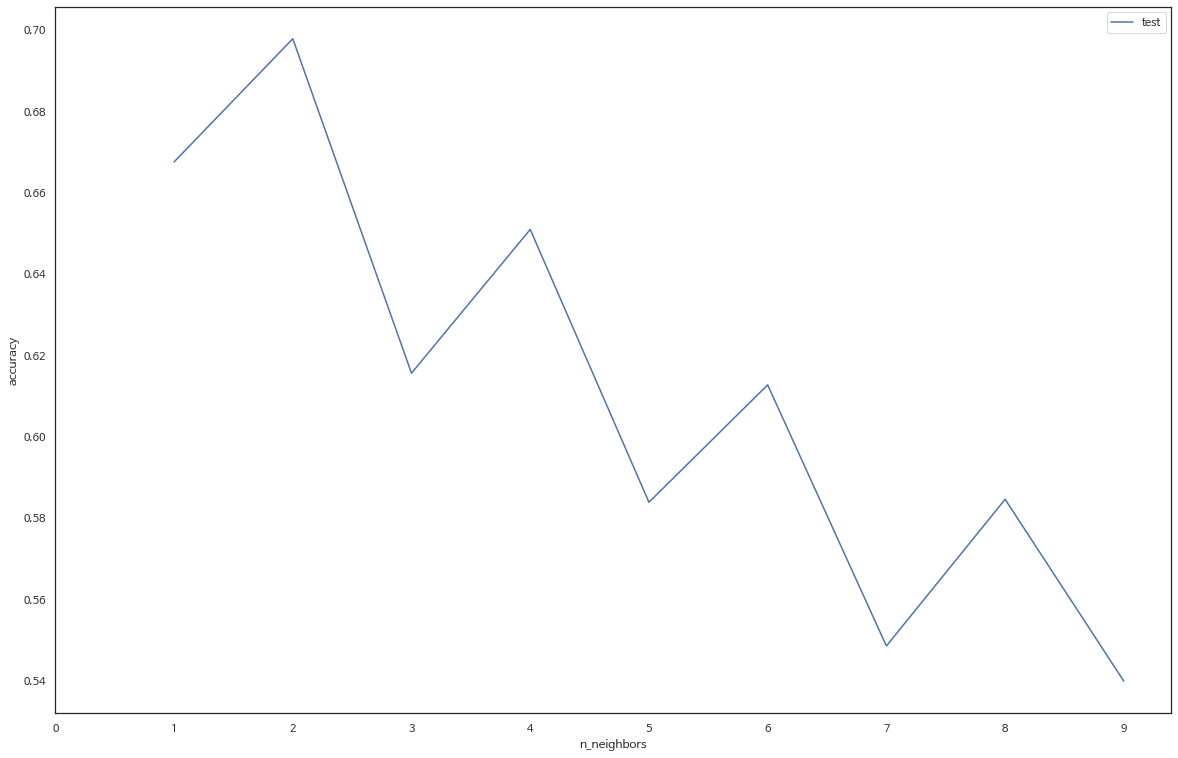

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1,10),test_acc,label='test')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0,10,step=1))
plt.legend()
plt.show()

In [ ]:
clf=KNeighborsClassifier(2)
clf.fit(x_train2,y_train) #knn 모델 생성

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred=clf.predict(x_test2) #예측

In [ ]:
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[913 213]
 [206  54]]


In [ ]:
acc=accuracy_score(y_test,y_pred) #f-1, 정확도확인
f1 = f1_score(y_test,y_pred,average='weighted')
print(f"f1:{f1:4f} acc:{acc:.4f}")#f1:0.702960 acc:0.7063

f1:0.699228 acc:0.6977


# 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100,
                               max_depth = 15,
                                n_jobs = -1,
                                 verbose = 1,
                               random_state = 101)
rf_clf.fit(x_train2, y_train)
pred = rf_clf.predict(x_test2)
print(accuracy_score(y_test, pred)) #랜덤포레스트 처음 모델 생성 후 정확도 확인
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='weighted')
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}") 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s


0.6825396825396826
f1:0.692130 accuracy:0.6825


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
#성능확인
cmat = confusion_matrix(y_test,pred)
print(cmat)

[[883 243]
 [197  63]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators' : [100, 200],
          'max_depth' : [6, 8, 10, 12],
         'min_samples_leaf' : [8,12,18],
         'min_samples_split' : [8, 16, 20]}

rf_clf4 = RandomForestClassifier(random_state = 103,
                                 n_jobs = -1,
                                 verbose = 1)
grid_cv1 = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv=3)

grid_cv1.fit(x_train2, y_train)

grid_cv2 = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv=3,
                       scoring='f1')

grid_cv2.fit(x_train2, y_train)
#f1스코어 모델 기준 예측값
pred=grid_cv2.predict(x_test2)

print('최적 하이퍼 마라미터: ', grid_cv1.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv1.best_score_))
print('최적 하이퍼 마라미터: ', grid_cv2.best_params_)
print('최고 f1-score: {:.4f}'.format(grid_cv2.best_score_))

# 최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
# 최고 예측 정확도: 0.7568
# 최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
# 최고 f1-score: 0.7590

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s


최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.7481
최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 f1-score: 0.7515


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
#gridcv 성능확인
cmat=confusion_matrix(y_test,pred)
print(cmat)

[[851 275]
 [190  70]]


# boosting - xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score

# 검증 데이터 넣어주어서 교차검증 해보도록하기
evals = [(x_test2, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,
                           max_depth=3)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper.fit(x_train2, y_train, early_stopping_rounds=200,
               eval_set=evals, eval_metric='logloss')

pred = xgb_wrapper.predict(x_test2)
pred_proba = xgb_wrapper.predict_proba(x_test2)[:, 1]
print(pred_proba[:10])

accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='weighted')
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}") #f1:0.513268 accuracy:0.7395

[0]	validation_0-logloss:0.689811
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.687462
[2]	validation_0-logloss:0.685378
[3]	validation_0-logloss:0.682967
[4]	validation_0-logloss:0.681171
[5]	validation_0-logloss:0.679591
[6]	validation_0-logloss:0.67769
[7]	validation_0-logloss:0.676057
[8]	validation_0-logloss:0.675203
[9]	validation_0-logloss:0.675071
[10]	validation_0-logloss:0.674418
[11]	validation_0-logloss:0.672641
[12]	validation_0-logloss:0.67107
[13]	validation_0-logloss:0.670074
[14]	validation_0-logloss:0.668731
[15]	validation_0-logloss:0.668503
[16]	validation_0-logloss:0.66791
[17]	validation_0-logloss:0.664094
[18]	validation_0-logloss:0.663859
[19]	validation_0-logloss:0.663409
[20]	validation_0-logloss:0.663105
[21]	validation_0-logloss:0.662952
[22]	validation_0-logloss:0.66293
[23]	validation_0-logloss:0.66268
[24]	validation_0-logloss:0.662748
[25]	validation_0-logloss:0.662016
[26]	validation_0-logloss:0.662165
[

In [ ]:
#성능확인
cmat = confusion_matrix(y_test,pred)
print(cmat)

[[997 129]
 [226  34]]


In [ ]:
xgb_wrapper.predict(x_test2)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("##########################################")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,5,8,10,15] ,
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.05, 0.1],
    'gamma': [0.5,1,2,3], 
    'colsample_bytree' : [0.8,0.9],
    'random_state':[99]
}


grid_cv = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1)
grid_cv.fit(x_train2, y_train)
grid_cv2 = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1, scoring='f1')
grid_cv2.fit(x_train2, y_train)

pred = grid_cv2.predict(x_test2) #f1스코어기준 모델의 예측값

print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)
print("최적의 파라미터:", grid_cv2.best_params_)
print("최고의 f1socre :", grid_cv2.best_score_)
# 최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
# 최고의 정확도 : 0.8340397728843264
# 최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
# 최고의 f1socre : 0.8149735131600061

##########################################
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Fitting 3 folds for each of 240 candidates, totalling 720 fits
최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
최고의 정확도 : 0.8340397728843264
최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
최고의 f1socre : 0.8149735131600061


In [ ]:
cmat=confusion_matrix(y_test,pred)
print(cmat) #f1스코어기준 혼동행렬

[[987 139]
 [229  31]]


In [ ]:
# 주피터
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
#코랩에서
#plt.rc('font', family='NanumBarunGothic') 

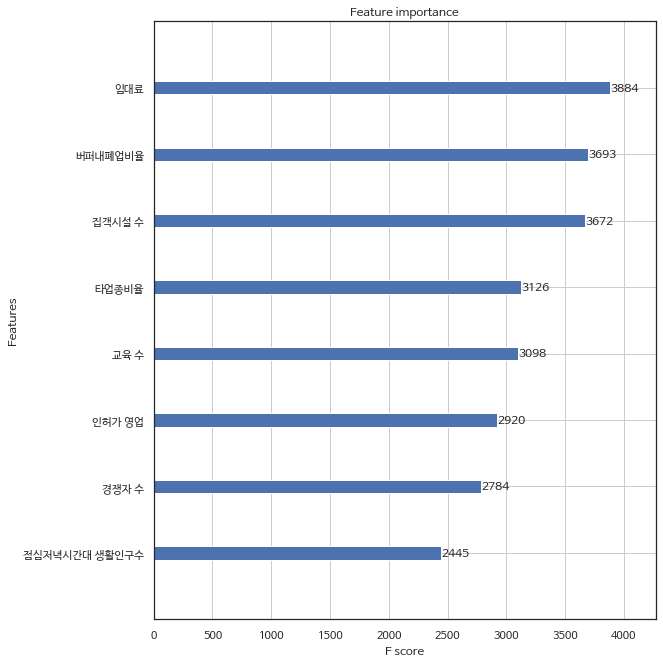

In [ ]:
# feature별 중요도 시각화하기
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,11))
plot_importance(grid_cv2.best_estimator_, ax)

<변수선택>


다중공선성 제외변수 : 인허가 영업+폐업, 인허가 폐업, 총생활인구수, 타업종경쟁자


로지스틱 제외변수 : 골목상권, 관광특구, 교통 수, 구분불가, 발달상권, 아파트 세대수, 전통시장, 소재지면적

최종변수 : 경쟁자 수, 교육 수, 버퍼내폐업비율, 인허가 영업, 임대료, 점심저녁시간대 생활인구수, 집객시설 수, 타업종비율

<모형>
로지스틱 : 
f1 : 0.727953, acc : 0.8015873015873016


KNN(k=2) : 
f1 : 0.699228, acc : 0.6977


랜덤포레스트 : 
f1 : 0.7515,  acc : 0.7481


랜덤포레스트(grid) : 
f1 : 0.7499, acc : 0.7417


XGBoost : 
f1 : 0.719788, acc : 0.7439


XGBoost(grid) : 
f1 : 0.8283028050016553, acc : 0.8405092592592592

<최종 모형> 

XGBoost-grid

# 예측

In [ ]:
#예측할 데이터 불러오기
forecast = pd.read_csv('/content/drive/MyDrive/bigdata_ML/호프통닭예측용.csv', encoding='cp949') #csv 불러오기, 코랩

forecast.head()

,경쟁자 수,교육 수,버퍼내폐업비율,인허가 영업,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
0,236,169,0.560038,458,930,10936.29824,8,0.773295
1,268,150,0.561216,534,920,10936.29824,8,0.779786
2,287,165,0.554487,556,1229,10936.29824,8,0.770032
3,100,61,0.580583,216,1764,10163.56076,2,0.805825
4,128,61,0.577160,274,1332,10163.56076,2,0.802469


In [ ]:
#예측할 데이터 불러오기
forecast = pd.read_csv('호프통닭예측용.csv', encoding='cp949') #csv 불러오기, 주피터

forecast.head()

In [ ]:
kf = sm.add_constant(forecast, has_constant="add")#데이터에 상수항 추가
kf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,경쟁자 수,교육 수,버퍼내폐업비율,인허가 영업,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
0,1.0,236,169,0.560038,458,930,10936.29824,8,0.773295
1,1.0,268,150,0.561216,534,920,10936.29824,8,0.779786
2,1.0,287,165,0.554487,556,1229,10936.29824,8,0.770032
3,1.0,100,61,0.580583,216,1764,10163.56076,2,0.805825
4,1.0,128,61,0.577160,274,1332,10163.56076,2,0.802469
...,...,...,...,...,...,...,...,...,...
3102,1.0,295,203,0.546199,776,648,44202.78123,16,0.827485
3103,1.0,308,184,0.545154,826,865,44202.78123,17,0.830396
3104,1.0,396,157,0.540153,1025,1235,44202.78123,17,0.822342
3105,1.0,516,186,0.525716,1291,1328,55277.92730,18,0.810434


In [ ]:
xgb_wrapper1 = XGBClassifier(colsample_bytree = 0.8, 
                            gamma = 0.5, learning_rate = 0.5, max_depth = 15, n_estimators = 200, random_state = 99)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper1.fit(x_train2, y_train,  eval_metric='logloss')

kfpred = xgb_wrapper1.predict(kf)
kfpred_proba = xgb_wrapper1.predict_proba(kf)[:, 1]
print(kfpred_proba[:10])


kfpred


[0.0267483  0.0267483  0.0267483  0.01709656 0.01709656 0.01223332
 0.01223332 0.01810208 0.01810208 0.01895813]


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
live = pd.DataFrame(kfpred)

In [ ]:
live.to_csv('hlive.csv',index=False,encoding='cp949') 

In [ ]:
live2 = pd.DataFrame(kfpred_proba)

In [ ]:
live2.to_csv('hlive1.csv',index=False,encoding='cp949') 